# Extract text from pdf files

In [2]:
import os
from mistralai import Mistral
import base64
import requests
import json

Extract text from pdf files using Mistral OCR
1. Get list of files in ./pdfs
2. For each file, extract text using Mistral OCR


In [ ]:
# get mistral_api_key from environment variable
mistral_api_key = os.getenv("MISTRAL_API_KEY")
mistral_ocr_url = "https://api.mistral.ai/v1/ocr"
ocr_model = "mistral-ocr-latest"
client = Mistral(api_key=mistral_api_key)

In [3]:
def encode_pdf(pdf_path):
    """Encode the pdf to base64."""
    try:
        with open(pdf_path, "rb") as pdf_file:
            return base64.b64encode(pdf_file.read()).decode('utf-8')
    except FileNotFoundError:
        print(f"Error: The file {pdf_path} was not found.")
        return None
    except Exception as e:  # Added general exception handling
        print(f"Error: {e}")
        return None


In [4]:
# read a file from ./pdfs
pdf_path = "./pdfs/0-666-676-684-696-chatham-street-west/Acoustical and Vibration Report.pdf"
pdf_path = "./pdfs/8607-8649-8675-8699-McHugh-Street/Application Form Plan of Subdivision or Condominium.pdf"
if not os.path.exists(pdf_path):
    raise FileNotFoundError(f"File not found: {pdf_path}")

# encode the pdf to base64
base64_pdf = encode_pdf(pdf_path)
print("sending request")
ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "document_url",
        "document_url": f"data:application/pdf;base64,{base64_pdf}" 
    }
)
print("request sent")

sending request
request sent


In [5]:
pdf_path = "./pdfs/8607-8649-8675-8699-McHugh-Street/Application Form Plan of Subdivision or Condominium.pdf"
if not os.path.exists(pdf_path):
    raise FileNotFoundError(f"File not found: {pdf_path}")

# encode the pdf to base64
base64_pdf = encode_pdf(pdf_path)

print("sending request")
# make a post request to the mistral url
mistral_response = requests.post(
    mistral_ocr_url,
    headers={
        "Authorization": f"Bearer {mistral_api_key}",
        "Content-Type": "application/json"
    },
    json={
        "model": ocr_model,
        "document": {
            "type": "document_url",
            "document_url": f"data:application/pdf;base64,{base64_pdf}"
        }
    }
)
print("request sent")

sending request
request sent


In [8]:
pdfs_folder = "./pdfs"
jsons_folder = "./jsons"
for root, dirs, files in os.walk(pdfs_folder):
    for file in files:
        if file.endswith(".pdf"):
            pdf_path = os.path.join(root, file)
            # Determine the corresponding JSON file path
            json_file_path = os.path.join(jsons_folder, os.path.relpath(pdf_path, pdfs_folder) + ".json")
            
            # Skip processing if the JSON file already exists
            error = False
            if os.path.exists(json_file_path):
                # print(f"Skipping {pdf_path} as JSON already exists.")
                print(f"File already exists: {json_file_path}")
                # read file, if file contains "type" key, it is an error
                with open(json_file_path, "r") as json_file:
                    data = json.load(json_file)
                    if "type" in data:
                        print(f"Error in file: {json_file_path}")
                        error = True
                        continue
                    elif "message" in data:
                        print(f"Error in file: {json_file_path}")
                        error = True
                        # continue
                    else:
                        print(f"File is valid: {json_file_path}")
                        continue
                # continue
            
            # Encode the PDF to base64
            # [TODO] check for error and try with a smaller version of this file
            base64_pdf = encode_pdf(pdf_path)
            if base64_pdf is None:
                continue
            
            # Make a POST request to the Mistral OCR URL
            mistral_response = requests.post(
                mistral_ocr_url,
                headers={
                    "Authorization": f"Bearer {mistral_api_key}",
                    "Content-Type": "application/json"
                },
                json={
                    "model": ocr_model,
                    "document": {
                        "type": "document_url",
                        "document_url": f"data:application/pdf;base64,{base64_pdf}"
                    }
                }
            )
            
            # Save the response to a JSON file
            os.makedirs(os.path.dirname(json_file_path), exist_ok=True)
            with open(json_file_path, "w") as json_file:
                json.dump(mistral_response.json(), json_file)
            print(f"Saved response to {json_file_path}")


File already exists: ./jsons/8607-8649-8675-8699-McHugh-Street/Application Form Plan of Subdivision or Condominium.pdf.json
File is valid: ./jsons/8607-8649-8675-8699-McHugh-Street/Application Form Plan of Subdivision or Condominium.pdf.json
File already exists: ./jsons/8607-8649-8675-8699-McHugh-Street/Condominium Drawings.pdf.json
File is valid: ./jsons/8607-8649-8675-8699-McHugh-Street/Condominium Drawings.pdf.json
File already exists: ./jsons/8607-8649-8675-8699-McHugh-Street/DPC Exemption Cover Letter (December 2021).pdf.json
File is valid: ./jsons/8607-8649-8675-8699-McHugh-Street/DPC Exemption Cover Letter (December 2021).pdf.json
File already exists: ./jsons/0-1095-1185-North-Talbot-Road/SDN-001_21 - Drawings.pdf.json
Error in file: ./jsons/0-1095-1185-North-Talbot-Road/SDN-001_21 - Drawings.pdf.json
File already exists: ./jsons/0-1095-1185-North-Talbot-Road/SDN-001_21 - Storm Water Management Report (updated).pdf.json
Error in file: ./jsons/0-1095-1185-North-Talbot-Road/SDN-00

In [1]:
print(ocr_response)

NameError: name 'ocr_response' is not defined

In [7]:
print(mistral_response)
print(mistral_response.json())

<Response [200]>
{'pages': [{'index': 0, 'markdown': '# SUBDIVISION/CONDOMINIUM APPLICATION \n\n## INSTRUCTIONS\n\n## Verify that you are using the most current application form.\n\nThis application is valid for: Plan of Subdivision, Plan of Condominium, Condominium Conversion, Extension of Draft Approval, Amendment to Draft Approval, Final Approval \\& Registration, Amendment to Agreement, or Amalgamation of Condominium Corporation. Discuss with a staff Planner to determine what must be completed for the application type.\n\nSection 1: Pre-Submission consultation with a staff Planner is mandatory per By-law 199-2007. If you do not have a valid Pre-Submission Letter, you must meet with a staff Planner who must sign and date this section.\nSection 2: During Pre-Submission consultation a staff Planner will indicate what supporting information must be submitted with the application. Read Pages 2 to 4 before submitting this application and other documents.\n\nSection 3: Provide the full na

In [80]:
# save ocr_response as json
import json
with open("ocr_response.json", "w") as f:
    json.dump(mistral_response.json(), f, indent=4)
# save ocr_response as text
# with open("ocr_response.txt", "w") as f:
#     for page in mistral_response.json():
#         f.write(page.text)
#         f.write("\n")

In [81]:
# read json from response.json
with open("response.json", "r") as f:
    pdf_data = json.load(f)
    # print the text from the json
    print(pdf_data)
print(mistral_response.json())

{'pages': [{'index': 8, 'markdown': '# SUBDIVISION/CONDOMINIUM APPLICATION \n\n## 7. PROPOSED LAND USES\n\nIndicate the intended uses of the land in the proposal. Complete this section in full.\n\n| All Applications |  |  |  |  |  | Condominium Only |  |\n| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |\n| Proposed Use | Number of Lots or Blocks | Number of Units or Dwellings | Hectares (ha) | Density (units/ ha) | Number of Parking Spaces | Date of Construction | Floor Coverage |\n| Detached <br> Residential |  |  |  |  | Condo Only |  |  |\n| Semi-detached <br> Residential |  |  |  |  | Condo Only |  |  |\n| Multiple Attached Residential |  |  |  |  |  |  |  |\n| Apartment <br> Residential | 4 | 232 | 1.97 | 117 | 290 |  |  |\n| Seasonal <br> Residential |  |  |  |  |  |  |  |\n| Mobile Home |  |  |  |  |  |  |  |\n| Other Residential |  |  |  |  |  |  |  |\n| Commercial |  |  |  |  |  |  |  |\n| Industrial |  |  |  |  |  |  |  |\n| Institutional (specify) |  |  |  |  |  |  

In [82]:
def create_chunks(data, chunk_size = 512, overlap=256):
    chunks = []
    for page in data["pages"]:
        # split the markdown into chunks
        text = page["markdown"]
        # split the text into chunks of size chunk_size
        for i in range(0, len(text), chunk_size):
            chunk = text[i:i+chunk_size]
            chunks.append(chunk)
    return chunks

def create_smart_chunks(data, chunk_size=512, overlap=256):
    import re
    chunks = []
    page_numbers = {}
    # for page in data["pages"]:
    for page_number, page in enumerate(data["pages"]):
        text = page["markdown"]
        table_start_pattern = r"(\n\|)"
        table_end_pattern = r"(\|\n(?!\|))"
        
        # Find table starts and ends
        table_starts = [m.start() for m in re.finditer(table_start_pattern, text)]
        table_ends = [m.start() for m in re.finditer(table_end_pattern, text)]
        
        char_index = 0
        i = 0
        j = 0
        # for i in range(len(table_starts)):
        temp_chunks = []
        print(table_starts)
        while i < len(table_starts) and j < max(len(table_ends), 1):
            print("inside this loop")
            # Capture non-table text before the current table
            if table_starts[i] > char_index:
                print("capturing non-table text")
                non_table_chunk = text[char_index:table_starts[i]].strip()
                if non_table_chunk:
                    # call create_chunks on the non-table chunk
                    non_table_chunks = create_chunks({"pages": [{"index": page_number, "markdown": non_table_chunk}]}, chunk_size, overlap)
                    for chunk in non_table_chunks:
                        if chunk not in page_numbers:
                            page_numbers[chunk] = []
                        page_numbers[chunk].append(page_number+1)
                    temp_chunks.extend(non_table_chunks)
                    # char_index = table_starts[i]
                # continue
            
            # Capture the table chunk
            start = table_starts[i]
            end = table_ends[j] if j < len(table_ends) else len(text)

            char_index = end + 1
            j += 1
            i += 1
            # check if table_starts[i] is greater than table_ends[j]
            # if not skip table starts until it is
            while i < len(table_starts) and j < len(table_ends) and table_starts[i] < table_ends[j]:
                i += 1
            # add some pre-start context to the table:
            table_chunk = text[start:end+1].strip()
            if table_chunk:
                temp_chunks.append(table_chunk)
        
        # Capture any remaining non-table text after the last table
        if char_index < len(text):
            remaining_chunk = text[char_index:].strip()
            if remaining_chunk:
                # temp_chunks.append(remaining_chunk)
                # call create_chunks on the remaining chunk
                remaining_chunks = create_chunks({"pages": [{"index": page_number, "markdown": remaining_chunk}]}, chunk_size, overlap)
                for chunk in remaining_chunks:
                    if chunk not in page_numbers:
                        page_numbers[chunk] = []
                    page_numbers[chunk].append(page_number+1)
                temp_chunks.extend(remaining_chunks)
        # add page number to each chunk
        for chunk in temp_chunks:
            if chunk not in page_numbers:
                page_numbers[chunk] = []
                page_numbers[chunk].append(page_number+1)
        
        chunks.extend(temp_chunks)

    return chunks, page_numbers
chunks, page_numbers = create_smart_chunks(mistral_response.json(), chunk_size=512, overlap=256)
# chunks, page_numbers = create_smart_chunks(pdf_data, chunk_size=512, overlap=256)
# if there are any chunks that are smaller than 512 characters, move them to the previous chunk
for i in range(len(chunks)):
    if len(chunks[i]) < 512:
        # move the chunk to the previous chunk
        if i > 0:
            chunks[i-1] += "\n" + chunks[i]
            chunks[i] = ""
# remove empty chunks and page entries for removed chunks
chunks = [chunk for chunk in chunks if chunk != ""]
for chunk in chunks:
    if chunk in page_numbers:
        del page_numbers[chunk]

[]
[]
[]
[]
[]
[646, 710, 740, 814, 866, 914, 998, 1044, 1067, 1086, 1117, 1138, 1262, 1325, 1355, 1405, 1458, 1516, 1580, 1641, 1671, 1723, 1765, 1801]
inside this loop
capturing non-table text
inside this loop
capturing non-table text
inside this loop
capturing non-table text
[235, 289, 305, 405, 450, 521, 610, 638, 671]
inside this loop
capturing non-table text
[]
[153, 211, 269, 449, 510, 576, 631, 697, 748, 785, 828, 864, 900, 949, 993, 1024, 1065]
inside this loop
capturing non-table text
[]
[]
[377, 427, 457, 532, 574, 649, 720, 819, 943, 1038, 1068, 1110, 1185, 1256, 1361, 1511, 1553, 1583, 1671, 1713, 1788, 1859, 1948]
inside this loop
capturing non-table text
inside this loop
capturing non-table text
[]
[]
[]
[]
[]
[]
[574, 613, 636, 726, 776, 826, 886, 916, 933, 944]
inside this loop
capturing non-table text


In [117]:
from IPython.display import Markdown, display
def print_markdown(text, index = None):
    if index is not None:
        print(index)
    try:
        display(Markdown(text))
    except Exception as e:
        print(f"Error displaying markdown: {e}")
        print(text)
# display chunks as markdown blocks
for i, chunk in enumerate(chunks):
    print_markdown(chunk, i)

0


# SUBDIVISION/CONDOMINIUM APPLICATION 

## INSTRUCTIONS

## Verify that you are using the most current application form.

This application is valid for: Plan of Subdivision, Plan of Condominium, Condominium Conversion, Extension of Draft Approval, Amendment to Draft Approval, Final Approval \& Registration, Amendment to Agreement, or Amalgamation of Condominium Corporation. Discuss with a staff Planner to determine what must be completed for the application type.

Section 1: Pre-Submission consultation with

1


 a staff Planner is mandatory per By-law 199-2007. If you do not have a valid Pre-Submission Letter, you must meet with a staff Planner who must sign and date this section.
Section 2: During Pre-Submission consultation a staff Planner will indicate what supporting information must be submitted with the application. Read Pages 2 to 4 before submitting this application and other documents.

Section 3: Provide the full name, address, phone number, fax number and email address of the applicant, registered owner

2


, agent, and Ontario Land Surveyor. For a corporation, provide full corporate name. Include the full name of a contact person. For more than one person, corporation, or registered owner, use additional sheets.
Section 4: Indicate if you are resubmitting a previous or earlier plan and if yes, provide the file number.
Section 5: Provide information about the Subject Land. This information is used to determine supporting information requirements and to assist in the review of the application.

Section 6: Indic

3


ate if the plan is consistent with the Provincial Policy Statement and conforms to the City of Windsor Official Plan and the appropriate Zoning By-law. If an Official Plan Amendment and/or Zoning By-law Amendment is required, you must have already submitted those applications, or must submit them with this application, otherwise this application will be returned.

Section 7: Complete this section if you are applying for approval of a Plan of Condominium. New construction applies to buildings that were recen

4


tly built, under construction, or not yet under construction. Conversion applies to existing buildings that contain residential rental units that are being converted to Condominium Status. To be considered for an exemption from Section 9(3) of the Condominium Act, you must formally request such exemption. Submit all the documents indicated in Section 7 with this application.

Section 8: Provide the number of lots, blocks, units or dwellings, the number of hectares, the density measured as units per hectare 

5


and the number of parking spaces for the proposed land use for all applications. For Plan of Condominium applications also provide the date of construction and the floor coverage in square metres.

Section 9: Indicate how the property is accessed. Check all boxes that apply.
Section 10: Provide information about water service, sanitary sewage disposal and storm drainage. Submit all required documents indicated in Section 10 with this application.

Section 11: Provide a description of the existing land use, 

6


buildings \& infrastructure, vegetation, topography \& drainage of the subject land or check the box beside "See Planning Rationale Report" if described in the report.

Section 12: Provide a description of what measures have been or will be taken to mitigate adverse environmental effects from the proposed development on the surrounding areas and from the surrounding areas on the proposed development or check the box beside "See Planning Rationale Report" if described in the report.

Section 13: Explain your

7


 proposed strategy for consulting with the public.
Section 14: Check the appropriate application fee box based on the pre-submission

DATE RECEIVED STAMP consultation with the Planner.

Section 15: Print you name in full and sign the sworn declaration in the presence of a Commissioner for Taking Affidavits.

Schedules: Read, complete in full, and sign Schedules A \& E.
Submit application form, supporting information, \& application fee/credit card authorization to Senior Steno Clerk at Planning Division, Su
ite 210, 350 City Hall Square West, Windsor ON N9A 6S1 or planningdept@citywindsor.ca

8


# SUBDIVISION/CONDOMINIUM APPLICATION 

## PLAN REQUIREMENTS

## A. NUMBER OF COPIES REQUIRED

The Planning Act, R.S.O. 1990, c. P.13, requires that copies of the draft plan as required by the Minister must accompany all applications.
A1. Submit six (6) full size paper copies of the draft plan; AND
A2. A digital copy of the CAD files of the draft plan in DWG, PDF, and JPG formats.
File names should be logical and clearly indicate the nature of the file and include either the SDN or CDM file number (SDN 000-

9


00 or CDM 000-00) or the name of the applicant and site location.
For example, "SDN000-00 draft plan.dwg" or "Applicant Name-Site Location-Draft Plan.dwg".
If further copies are required, we will notify you. To submit drawings on an alternate device, please discuss with the assigned Planner.

## B. DRAFT PLAN REQUIREMENTS

All plans and measurements must be in metric. Draft plans must be drawn to scale and indicate all items as required by Section 51(17) of the Planning Act and the City of Windsor as follow

10


s:

B1. Boundaries of the land to be subdivided, certified by an Ontario Land Surveyor, and based on NAD83, Zone 17.
B2. Locations, widths and names of proposed roads, streets, highways and rights-of-way within the proposed subdivision and existing roads, streets, highways, and rights-of-way abutting the proposed subdivision;
B3. On a small key plan, with a scale of not less than one centimetre to 100 metres, all of the land adjacent to the proposed subdivision that is owned by the applicant or in which the

11


 applicant has an interest, every subdivision adjacent to the proposed subdivision and the relationship of the boundaries of the land to be subdivided to the boundaries of the township lot or other original grant of which such land forms the whole or part;
B4. Purpose for which the proposed lots are to be used;
B5. Existing uses of all adjoining lands;
B6. Approximate dimensions and layout of the proposed lots and/or blocks;
B7. If any affordable housing units are being proposed, the shape and dimensions of

12


 each proposed affordable housing unit and the approximate location of each proposed affordable housing unit in relation to other proposed residential units;
B8. Natural and artificial features such as buildings or other structures or installations, railways and rail yards, highways, roads, streets and recreational trails, hydro lines and other public utilities, watercourses, drainage ditches, wetlands and wooded areas, archaeological or heritage features, and significant plant and wildlife habitat (includi

13


ng ESAs \& ANSIs) within or adjacent to the land proposed to be subdivided;
B9. Availability and nature of domestic water supplies;
B10. Nature and porosity of the soil;
B11. Existing contours or elevations as may be required to determine the grade of the streets, roads and highways and the drainage of the land proposed to be subdivided;
B12. Municipal services available or are to be available to the land proposed to be subdivided;
B13. Nature and extent of any restrictions affecting the land proposed to be
 subdivided including restrictive covenants, easements, or the Airport Operating Area; and
B14. Floodplains, flood ways, flood prone areas, and flood elevations

## C. CONDOMINIUM DRAFT PLAN REQUIREMENTS

In addition to the above requirements, draft plans proposing condominium ownership must include:
C1. Proposed exclusive use areas of the common element such as backyards and parking;
C2. Roadways and pedestrian access to proposed private units.

14


# SUBDIVISION/CONDOMINIUM APPLICATION 

## APPLICATION PROCESSING

The applicant or their agent is responsible for researching and evaluating the site and the proposal to ensure that the development will conform to the interests of the health, safety, and welfare of existing and future residents, and for filling in the application and for supplying all documents necessary to constitute a complete application. Supporting studies must be conducted prior to the submission of the application. This information w

15


ill used to review and assess the application
Section 51(24) of the Planning Act and Section 11.4.2.3 of the City of Windsor Official Plan list the criteria that are used in evaluating a draft plan. Where additional copies of the plan or supporting documents are subsequently requested by staff or review agencies, the applicant is responsible for supplying them at their cost
Timelines in the Planning Act have been suspended during the State of Emergency. The following is for your information only. Review the

16


 Planning Act and relevant regulations for statutory requirements. The processing of the application is subject to change. The application will be terminated without notice after 60 days of inactivity. Direct all questions about the application to the assigned Planner. The procedure generally encompasses the following steps:

1. Within 30 days of receiving this application, the City Planner, or their designate, will review the application to determine if it is or is not complete. If deemed incomplete, the a

17


pplication, supporting documents, and fee may be returned for completion, correction, or clarification, or the applicant may be requested to submit additional or revised supporting information. Administration, the Development \& Heritage Standing Committee (DHSC), and City of Windsor Council reserve the right to request additional information any time during the processing of the application.
2. If deemed complete, fees are not refundable, the application is circulated to departments and external agencies f

18


or review and comment, and all submitted documents are made available to the public.
3. Following circulation, a draft staff report containing a recommendation and any conditions is prepared. The City Planner and other staff review the draft staff report.
4. When the staff report is approved by appropriate municipal staff, it will be scheduled for a future meeting of the Development and Heritage Standing Committee (DHSC).
5. Mandatory public notice of the DHSC meeting is advertised in the Windsor Star at le

19


ast 20 days in advance of the DHSC meeting. A courtesy notice may be mailed to all property owners and/or tenants within 120 metres of the subject land. The DHSC meeting is the public meeting required by the Planning Act. The staff report is provided to the applicant and DHSC members, and is made available to the public, 10 days before the DHSC meeting.
6. At the DHSC meeting, a staff planner introduces the application and reviews the recommendation in the staff report. The applicant and other interested pa

20


rties are given an opportunity to make verbal or written submissions. The DHSC may ask questions of the staff planner, the applicant and their representatives and any party that made verbal or written submissions. The DHSC may choose to recommend draft approval, denial or deferral of the application. It may also modify the recommendation of the Planning Division.
7. If recommended for draft approval or denial, the staff report and the minutes of the DHSC meeting are forwarded to City of Windsor Council for 

21


consideration at a future date. The Planning Division has no control over the placement of an application on a Council Meeting agenda. The City Clerk will forward the date and time of the Council Meeting to the contacts in Section 3. Call 311 or contact the City Clerk at 519-255-6211 or clerks@citywindsor.ca
8. The Council meeting, the applicant and the other parties may make verbal or written submissions. If the applicant concurs with the recommendation of DHSC, and there is no opposition to the applicatio

22


n, Council may place the application on the Consent Agenda, a part of the Council meeting containing items that are grouped together and passed with one motion. Council may choose to draft approve, deny, or defer the application.
9. Applications may be referred, or the decision of Council may be appealed, to the Ontario Land Tribunal (OLT). Appeals are filed with the City Clerk. Contact the City Clerk at 519-255-6211 or clerks@citywindsor.ca
10. If Council approves the draft plan and no appeals are received
, an agreement is prepared for signature and registration on title.
11. The conditions of draft approval must be fulfilled prior to the expiry of draft approval. It is the responsibility of the property owner or applicant to obtain confirmation from agencies and departments that the conditions of draft approval have been fulfilled. Some agencies may require that a copy of the completed subdivision agreement be forwarded to them prior to notifying the City that the conditions have been fulfilled.

23


# SUBDIVISION/CONDOMINIUM APPLICATION 

## FINAL APPROVAL \& REGISTRATION REQUIREMENTS

When you are ready to obtain final approval and register the plan, the following must be submitted:

1. Fee for Final Approval \& Registration - see Section 14 - Fees on page 13;
2. One (1) mylar copy of the plan to be registered;
3. Five (5) paper copies of the plan to be registered, one of which has the AOLS Plans Submission Form attached to it; and
4. One digital file transfer device containing geo-referenced CAD file

24


s of the plan to be registered.

## OTHER INFORMATION

Read the staff report, draft approval, final approval, and agreements carefully and take note of all conditions and expiry dates in these documents.

Other municipal departments and external agencies may have their own requirements, fees and approvals in addition to the requirements, fees and approvals listed in this application form.

The City of Windsor does not send reminders regarding conditions and expiry dates. It is the responsibility of the prop

25


erty owner to complete all conditions or obtain approval from Council or the delegated approval authority to extend draft approval, prior to the expiry date.

When submitting an extension to draft approval, you must allow for sufficient time to process the application and to obtain approval of the extension. Submission, or acceptance, of an application for an extension to draft approval does not automatically extend the expiry date. It is the responsibility of the property owner to be aware of all condition
s and expiry dates.

Planning legislation, regulations, fees, and processes are subject to change.

## CONTACT INFORMATION

Planning \& Building Department - Planning Division
St.

350 City Hall Square West Windsor ON N9A 6S1

Telephone: 519-255-6543
Fax: 519-255-6544
Email: planningdept@citywindsor.ca
Web Site: www.citywindsor.ca

26


# SUBDIVISION/CONDOMINIUM APPLICATION 

## 1. PRE-SUBMISSION CONSULTATION

By-law 199-2007 requires pre-submission consultation with a staff Planner to determine what supporting information is required, to verify fee payable, and to review the process. This application is incomplete unless you have a valid Pre-Submission Letter or a staff Planner signs below.

Valid Pre-Submission Letter? NO $\square$ YES $\square$ File Number: PS-
Staff Use Only

Signature of Staff Planner
Date of Consultation
$\square$ Ji

27


m Abbs
$\square$ Justina Nwaesei

## 2. REQUIRED SUPPORTING INFORMATION (To be completed by a staff Planner)

If you do not have a valid Pre-submission Letter, a staff Planner will indicate below what supporting information must be submitted with the application. The City of Windsor reserves the right to require additional supporting information during the processing of the application. All documents submitted are made available for public review.
Unless otherwise indicated, for each document, provide one p

28


aper copy and one digital copy. Draft Plans shall be provided in DWG, PDF \& JPG format. Other drawings shall be provided in letter size ( 8.5 by 11 inches) in JPG and PDF format. All other documents shall be provided in Word and PDF format. PDF documents shall be flattened with no layers.
If you are submitting a companion planning application (official plan or rezoning), you need only submit one set of the required supporting information. Include checked supporting information with this application:
![img-
0.jpeg](img-0.jpeg)

29


# SUBDIVISION/CONDOMINIUM APPLICATION 

## 3. CONTACT INFORMATION

Provide in full the name of the applicant \& contact person, registered owner, agent, \& Ontario Land Surveyor and mailing address, phone \& fax number and email address. If the case of a numbered company, provide the name of the principals of the company. If there is more than one applicant or registered owner, copy this page, complete in full and submit with this application. All communication regarding the application will be with the Age
nt authorized by the Owner to file the application. If there is no Agent, all communication will be with the Applicant.

## Applicant

30



| Name: | Farhi Holding Corporation | Contact: | Shmuel Farhi |
| :--: | :--: | :--: | :--: |
| Address: | 484 Richmond Street, Suite 200 |  | Name of Contact Person |
| Address: | London, ON |  | Postal Code: N6A 3E6 |
| Phone: | 519-645-6666 | Fax: | 519-645-7735 |
| Email: | farhi@farhi.ca |  |  |

31



## Registered Owner $\square$ Same as Applicant

| Name: | Contact: | Name of Contact Person |
| :--: | :--: | :--: |
| Address: |  |  |
| Address: |  | Postal Code: |
| Phone: | Fax: |  |
| Email: |  |  |

Agent Authorized by the Owner to File the Application (If applicable, complete Section A1 in Schedule A)

32



Agent Authorized by the Owner to File the Application (If applicable, complete Section A1 in Schedule A)

| Name: | Dillon Consulting Limited | Contact: | Karl Tanner |
| :--: | :--: | :--: | :--: |
| Address: | 3200 Deziel Drive, Suite 608 |  |  |
| Address: | Windsor, ON |  | Postal Code: N5W 5K8 |
| Phone: | 519-948-5000 Ext. 3227 | Fax: | 519-948-5054 |
| Email: | ktanner@dillon.ca |  |  |

## Ontario Land Surveyor

33



## Ontario Land Surveyor

| Name: | Verhaegen Land Surveyors | Contact: | Roy Simone |
| :--: | :--: | :--: | :--: |
| Address: | 944 Ottawa Street, Windsor, ON |  |  |
| Address: |  |  | Postal Code: N8X 2E1 |
| Phone: | 519-258-1772 | Fax: |  |
| Email: | rsimone@vshbbsurveys.com |  |  |

34



# SUBDIVISION/CONDOMINIUM APPLICATION 

## 4. RESUBMISSION OF A PREVIOUS PLAN?

No $\mathbb{R}$ Yes $\square$ Previous Plan/File No. $\qquad$ Do Not Know $\square$

## 5. SUBJECT LAND INFORMATION (attach additional sheets as required)

35



| Municipal Address | 1600 Lauzon Road, Windsor, ON |
| :--: | :--: |
| Legal <br> Description | Pt of Lots 128, 129E, 129W, \& 132, Concession 1; Pts 1,5,6, 12R 22910 |
| Assessment Roll Number | 373907072000194 |
| Frontage (m) | 217m (McHugh St.) Depth (m) 167m Area (sq m) 1.94ha |
| Official Plan Designation Commercial, Institutional, and Residential designations |  |
| Current Zoning RD3.1 |  |
| Existing Uses Residential |  |
| Previous Uses | Previously used as a manufacturing facility |

36


List the names \& addresses of the holders of any mortgages, charges or encumbrances in respect of the subject land:

Are there any easements or restrictive covenants affecting the subject land? No $\square$ Yes $\square$
If YES, describe the easement or restrictive covenant and its effect:

Is the subject land located in an area of high archaeological potential? No $\mathbb{R}$ Yes $\square$
Will the plan permit development on land that has high archaeological potential? No $\mathbb{R}$ Yes $\square$
If YE

37


S, submit: An Archaeological Assessment prepared by a person who holds a licence that is effective with respect to the subject land, issued under Part VI (Conservation of Resources of Archaeological Value) on the Ontario Heritage Act; and a Conservation Plan for any archaeological resources identified in the Archaeological Assessment.
Has the subject land ever been subject of: (leave blank if unknown)
An application for a plan of subdivision/condominium or consent? No $\square$ Yes $\mathbb{R}$ File:
An app
lication for a zoning by-law amendment or a minor variance? No $\square$ Yes $\mathbb{R}$ File:
An application for approval of a site plan? No $\square$ Yes $\square$ File:
A Minister's Zoning Order (Ontario Regulation)? No $\square$ Yes $\square$ OR\# $\qquad$ Ontario Regulation

38


# SUBDIVISION/CONDOMINIUM APPLICATION 

## 6. PLANNING CONFORMITY

If an Official Plan Amendment and/or a Zoning By-law Amendment is required, the Planning Division must have already received it or it must be submitted with this application, otherwise this application will be returned as incomplete.

Is the plan consistent with Provincial Policy Statement?
$\square$
$\square$
Yes
No Yes
If No, you must submit a companion application for an Amendment to the Official Plan.
Does the plan conform to the Zoning 

39


By-law?
No Yes
If No, you must submit a companion application for an Amendment to the Zoning By-law.

## 7. PLAN OF CONDOMINIUM INFORMATION

## New Construction

Has the City approved a Site Plan? No $\square$ Yes $\square$ If Yes, attach the approved Site Plan.
Site Plan Agreement registered? No $\square$ Yes $\square$ If Yes, attach the Site Plan Agreement.
Has a Building Permit been issued? No $\square$ Yes $\square$ If Yes, attach the Building Permit.
Status of Building: Not Under Construction $\square$

40


 Under Construction $\square$ Completed $\square$ Date Completed: $\qquad$
Are any units occupied?
No $\square$
Yes $\square$ If Yes, number of units: $\qquad$

## Conversion of a Building Containing Residential Rental Units (Condominium Conversion)

Is this an application to convert a building containing residential units to condominium status?
No $\square \quad$ Yes $\square$ If Yes, submit a Structural Integrity Report
Does the building contain any residential rental units?
No $\square \quad$ Yes $\squar

41


e$ If Yes, attach a Rent Roll with the names of all tenants, the rent paid by each tenant and their apartment number.
How many rental units are to be converted: $\qquad$ units

Are tenants willing to purchase units if converted to condominium?
No $\square$ Yes $\square$ If Yes, attach documentation signed by tenants. Do Not Know $\square$

## Exemption from Section 9(3) of the Condominium Act

Are you applying for an exemption pursuant to Section 9(3) of the Condominium Act?
No $\square \quad$ Yes $\square$
 If Yes, attach a request for such exemption signed by the owner or agent.

42



# SUBDIVISION/CONDOMINIUM APPLICATION 

## 7. PROPOSED LAND USES

Indicate the intended uses of the land in the proposal. Complete this section in full.

43


| All Applications |  |  |  |  |  | Condominium Only |  |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| Proposed Use | Number of Lots or Blocks | Number of Units or Dwellings | Hectares (ha) | Density (units/ ha) | Number of Parking Spaces | Date of Construction | Floor Coverage |
| Detached <br> Residential |  |  |  |  | Condo Only |  |  |
| Semi-detached <br> Residential |  |  |  |  | Condo Only |  |  |
| Multiple Attached Residential |  |  |  |  |  |  |  |
| Apartment <br> Residential | 4 | 232 | 1.97 | 117 | 290 |  |  |
| Seasonal <br> Residential |  |  |  |  |  |  |  |
| Mobile Home |  |  |  |  |  |  |  |
| Other Residential |  |  |  |  |  |  |  |
| Commercial |  |  |  |  |  |  |  |
| Industrial |  |  |  |  |  |  |  |
| Institutional (specify) |  |  |  |  |  |  |  |
| Park or Open Space |  |  |  |  |  |  |  |
| Roads |  |  |  |  |  |  |  |
| Other (specify) |  |  |  |  |  |  |  |
| TOTAL |  |  |  |  |  |  |  |

44


# SUBDIVISION/CONDOMINIUM APPLICATION 

## 9. ACCESS TO SUBJECT LAND

Indicate if access to subject land is by: (check all that apply)
$\square$ Provincial Highway $\square$ Municipal Road $\square$ Another Public Road or a Right-Of-Way
$\square$ Water - If access to the subject land is by water only, describe the parking and docking facilities uses or to be used and provide the approximate distance of these facilities from the subject land and the nearest public road:

## 10. WATER, SANITARY SEWAGE AND STO

45


RM DRAINAGE

Water - Indicate whether water will be provided to the subject land by:
$\square$ Publicly owned \& operated piped water system
$\square$ Other $\qquad$
$\square$ Privately owned \& operated individual well
$\square$ Privately owned/operated communal well
Sanitary - Indicate whether sewage disposal will be provided to the subject land by:
$\square$ Publicly owned \& operated sanitary sewage system
$\square$ Other $\qquad$
$\square$ Privately owned \& operated individual septic system
$\square$ 

46


Privately owned \& operated communal septic system

Submit a Servicing Options Report and a Hydrogeological Report if any of the following apply:
a. More than five lots or units on privately owned \& operated individual or communal wells;
b. Five or more lots or units on privately owned \& operated individual or communal septic systems; or
c. Less than five lots or units on privately owned \& operated individual or communal septic systems, and more than 4,500 litres of effluent would be produced per day as 
a result of the development being completed;

Submit a Hydrogeological Report if the plan would permit development of less than five lots or units on privately owned \& operated individual or communal septic systems, and 4,500 litres of effluent or less would be produced per day as a result of the development being completed.

Storm Drainage - Indicate whether storm drainage will be provided by:
$\square$ Sewers
$\square$ Ditches
$\square$ Swales
$\square$ Other $\qquad$

47


# SUBDIVISION/CONDOMINIUM APPLICATION 

## 11. SITE APPRAISAL AND EVALUATION

Give a brief description of the existing land use, buildings and infrastructure, vegetation, topography and drainage of the subject land:
See Planning Rationale Report $\qquad$
$\qquad$
$\qquad$
$\qquad$
$\qquad$

## 12. MITIGATION OF ENVIRONMENTAL EFFECTS

What measures (such as buffering, berms, setbacks, barriers, etc.) have been or will be taken to mitigate adverse environmental effects (such as traffic, noise, odours, polluti

48


on of nearby water bodies, etc.) from the proposed development on the surrounding areas and to mitigate adverse effects from the surrounding areas on the proposed development? In agricultural areas, refer to the Agricultural Code of Practice.
Where potential adverse environmental effects (species-at-risk, wetland protection, floodplains, etc.) are foreseen, consultation with the Ministry of Natural Resources and Forestry, the Ministry of Environment, Conservation and Parks, and/or the Essex Region Conservat
ion Authority is recommended.

See Planning Rationale Report
$\qquad$
$\qquad$
$\qquad$
$\qquad$

## 13. PROPOSED PUBLIC CONSULTATION STRATEGY

Select or describe your proposed strategy for consulting with the public with respect to the application:
$\square$ Required Public Consultation (Public Notice \& Public Meeting as required per the Planning Act)
$\square$ Open House $\square$ Website
Other $\qquad$
$\qquad$
$\qquad$

49



# SUBDIVISION/CONDOMINIUM APPLICATION 

## 14. FEES

Verify fees before submitting the application. Fees are subject to change and are not refundable when the application is deemed complete. Method of payment: Cash, Mastercard or Visa (complete and attach Credit Card Authorization), or by Certified Cheque or Personal Cheque payable to The Corporation of the City of Windsor.

50



| Plan of Subdivision - Draft Approval |  |  |  |
| :--: | :--: | :--: | :--: |
| Code 53007 | Base Fee: | lots/blocks at $\$ 684.00$ per lot/block | \$ |
| Code 63024 | GIS Fee | $+\$ 50.00$ |  |
| Code 53023 | Essex Region Conservation Authority Fee | $+\$ 300.00$ |  |
| Code 53010 | Legal Fee - Agreement Preparation | $+\$ 2,184.78$ |  |
| Code 53010 | Legal Variable Fee: $\qquad$ lots/blocks at $\$ 50.00$ per lot/block | $\$ \$$ |  |
|  | Plan of Subdivision (Draft Approval) Total Fee | $=$ |  |

51


## [⿴囗 Plan of Condominium - Draft Approval - New Building

| Code 53007 | Base Fee: $\quad 232$ | lots/units at $\$ 185.00$ per lot/unit | \$ 42,920.00 |
| :--: | :--: | :--: | :--: |
| Code 63024 | GIS Fee | $+\$ 50.00$ |  |
| Code 53023 | Essex Region Conservation Authority Fee | $+\$ 300.00$ |  |
| Code 53010 | Legal Fee - Agreement Preparation | $+\$ 1,714.98$ |  |
| Code 53010 | Legal Variable Fee: $\qquad$ lots/units at $\$ 50.00$ per lot/unit | $+\$ 11,600.00$ |  |
|  | Plan of Condominium (Draft Ap
proval) Total Fee | $=\$ 56,584.98$ |  |

## $\square$ Condominium Conversion - Draft Approval - Existing Building

52


## $\square$ Condominium Conversion - Draft Approval - Existing Building

| Code 53009 | Base Fee | \$ | 7,575.00 |
| :--: | :--: | :--: | :--: |
| Code 53009 | Base Fee per Unit: $\qquad$ units at $\$ 71.40$ per unit | $+\$ \$$ |  |
| Code 63024 | GIS Fee | $+\$ 50.00$ |  |
| Code 53023 | Essex Region Conservation Authority Fee | $+\$ 300.00$ |  |
| Code 53010 | Legal Fee - Agreement Preparation | $+\$ 1,714.98$ |  |
| Code 53010 | Legal Variable Fee: $\qquad$ units at $\$ 50.00$ per unit | $+\$ \$$ |  |
|
  | Condominium Conversion (Draft Approval) Total Fee | $=\$ \$$ |  |

A Building Division Inspection Fee for an inspection and report preparation will be invoiced separately. Contact the Building Division at 519-255-6267 for additional information.

## Fees Continued on Next Page

53


# SUBDIVISION/CONDOMINIUM APPLICATION 

## 14. FEES (continued)

Plan of Subdivision/Condominium - Extension of Draft Approval
Code 53035
Total Fee $=\$ 3,329.60$

Plan of Subdivision/Condominium - Amendment to Draft Approval
Code 53007
Base Fee $\quad \$ 3,646.30$
Code 63024
GIS Fee + $\$ 50.00$
Amendment to Draft Approval Total Fee $=\$ 3,696.30$

## Plan of Subdivision/Condominium - Final Approval \& Registration

Payment of this fee is per registration and is required prior to final approval and registr

54


ation of every draft approved Plan of Subdivision, Plan of Condominium, and Condominium Conversion.
Code 71130
Per Registration $=\$ 519.60$

## Plan of Subdivision/Condominium - Amendment to Agreement

Code 71102
Base Fee $\quad \$ 3,048.00$
Code 53010
Legal Fee - Agreement Preparation + $\$ \quad 857.49$
Amendment to Agreement Total Fee $=\$ 3,905.49$

Plan of Condominium - Amalgamation of Condominium Corporation
Code 53009
Total Fee $=\$ 1,863.00$

## Re-notification of Public Notice/Applicant Request fo

55


r Deferral Fee

Required when an applicant requests a deferral after notice of a public meeting has been given.
Code 53016
Total Fee $=\$ \$ 2,258.40$

## Ontario Land Tribunal (OLT) Appeal Fee - \$1,100.00

An appeal is made through the Office of the City Clerk (519-255-6211). Fees, forms, and processes are subject to change. Visit https://olt.gov.on.ca for additional information.

Engineering Review Fee - The Office of the City Engineer will collect a fee equal to 4\% of total municipal infrastructure con
struction costs excluding water, hydro, telecommunication, and gas infrastructure. The fee is payable at the time construction drawings are submitted to the City Engineer for signature. The total value of construction will be confirmed based on an estimate provided by the developer's Consulting Engineer. Contact Patrick Winters, Development Engineer, at 519-255-6100 ext 6462 or pwinters@citywindsor.ca for additional information.

56


# SUBDIVISION/CONDOMINIUM APPLICATION 

## 15. SWORN DECLARATION OF APPLICANT

Complete in the presence of a Commissioner for Taking Affidavits. If the declaration is to be administered remotely, you must be able to see, hear and communicate with the Commissioner and show documentation that confirms your identity.
I. Karl Tanner, Dillon Consulting Limited $\qquad$ solemnly declare that the information required under Schedule 1 to Ontario Regulation 544/06 and provided by the applicant is accurate and that t

57


he information contained in the documents that accompany this application is accurate, that if this declaration was administered remotely that it was in accordance with Ontario Regulation 431/20, and I make this solemn declaration conscientiously believing it to be true, and knowing that it is of the same force and effect as if made under oath.
![img-1.jpeg](img-1.jpeg)

Signature of Applicant
Sign in the presence of a Commissioner
For Taking Affidavits
$\square$ This declaration was administered remotely i
n accordance with Ontario Regulation 431/20
Declared before me $\qquad$ at the Dillon Consulting Limited in the City of Windsor Signature of Commissioner

Location of Commissioner
this $\qquad$ day of $\qquad$ December $\qquad$ 2021
day $\qquad$ month $\qquad$ year
PLACE AN IMPRINT OF YOUR STAMP BELOW
Melanie Anne Muir,
a Commissioner, etc., Province of Ontario
for Dillon Consulting Limited
Expires May 3, 2022

## COMPLETE SCHEDULES A \& E IN FULL \& SIGN

58


# SUBDIVISION/CONDOMINIUM APPLICATION 

## SCHEDULE A - Authorizations \& Acknowledgement

## A1. Authorization of Registered Owner for Agent to Make the Application

If the applicant is not the registered owner of the land that is the subject of this application, the written authorization of the registered owner that the agent is authorized to make the application must be included with this application form or the authorization below must be completed.

## I, $\underline{\text { Shmuel Farhi }}$ <br> name 

59


of registered owner

am the registered owner of the land that is subject of this application and I authorize
![img-2.jpeg](img-2.jpeg)

Signature of Registered Owner
to make this application on my behalf.
![img-3.jpeg](img-3.jpeg)

## A2. Authorization to Enter Upon the Subject Lands and Premises

I. Shmuel Farhi
, hereby authorize the members of the Planning, Heritage
\& Economic Development Standing Committee and City Council and staff of The Corporation of the City of Windsor to enter upon the subject la
nd and premises described in Section 5 of the application form for the purpose of evaluating the merits of this application and subsequently to conduct any inspections on the subject land that may be required as condition of approval. This is their authority for doing so.
![img-4.jpeg](img-4.jpeg)

Signature of Registered Owner
Date

If Corporation - I have authority to bind the corporation

## SCHEDULE A CONTINUES ON NEXT PAGE

60


# SUBDIVISION/CONDOMINIUM APPLICATION 

## SCHEDULE A - Authorizations \& Acknowledgements - Continued

## A3. Acknowledgements

## Receipt \& Review, Fees \& Termination, Other Requirements \& Expiry Dates, and Freedom of Information

I acknowledge that receipt of this application by the City of Windsor does not guarantee it to be a complete application and that further review of the application will occur and that I may be contacted to provide additional information and/or resolve any discrepancies or iss

61


ues with the application as submitted.
I further acknowledge that after the application is deemed complete, fees are not refundable, additional information may be requested, and that after 60 days of inactivity the City of Windsor may terminate the application without notice.
I further acknowledge that other municipal departments and external agencies may have their own requirements, fees and approvals in addition to the requirements, fees and approvals described throughout this application form, in any sta

62


ff reports, and in any agreements, and that it is my responsibility to read the staff report, draft approval, final approval and agreements and to note any expiry dates in any of these documents.
I further acknowledge that pursuant to the provisions of the Planning Act and the Municipal Freedom of Information and Protection of Privacy Act, this application and all material and information provided with this application are made available to the public.

## Species at Risk

Ontario's Endangered Species Act p

63


rotects endangered and threatened species - animals and plants in decline and at risk of disappearing from the province by restricting activities that may affect these plants, animals or their habitats.
I acknowledge that it is my sole responsibility as the Applicant to comply with the provisions of the Endangered Species Act, 2007, S. O. c.6. This could require me to register an activity, get a permit or other authorization from the Ministry of the Environment, Conservation and Parks (MECP) prior to conduc

64


ting an activity that could impact an endangered or threatened plant or animal or its habitat. I further acknowledge that any Planning Act, R.S.O. 1990, c.P. 13 approval given by the City of Windsor does not constitute an approval under the Endangered Species Act, nor does it absolve me from seeking the necessary authorization, approvals or permits from the MECP prior to conducting any activity that may affect endangered or threatened plant or animal or its habitat.

Additional information can be found at:

https://www.ontario.ca/page/development-and-infrastructure-projects-and-endangered-or-threatened-species or by contacting MECP at SAROntario@ontario.ca

## Acknowledgement

I acknowledge that I have read and understand the above statements:
![img-5.jpeg](img-5.jpeg)

Signature of Applicant or Agent
Date

## END OF SCHEDULE A - COMPLETE SCHEDULE E ON NEXT PAGE

65


# SUBDIVISION/CONDOMINIUM APPLICATION 

## SCHEDULE E - Environmental Site Screening Questionnaire

Previous Use of Property
$\square$ Residential $\quad$ Industrial $\quad \square$ Commercial $\quad \square$ Institutional
$\square$ Agricultural $\quad \square$ Parkland $\quad \square$ Vacant $\quad \square$ Other $\qquad$
a) If previous use of the property is Industrial or Commercial, specify use:

## Manufacturing facility for automobile industry

b) Has the grading of the subject land been changed by add

66


ing earth or material? Has filling occurred on the subject land?
$\square$ Yes
$\square$ No
$\square$ Unknown
c) Has a gasoline station and/or automobile service station been located on the subject land or adjacent lands at any time?
$\square$ Yes
$\square$ No
$\square$ Unknown
d) Has there been petroleum or other fuel stored on the subject land or adjacent lands?
$\square$ Yes
$\square$ No
$\square$ Unknown
e) Are there or have there ever been underground storage tanks or buried waste on the subject land o

67


r adjacent lands?
$\square$ Yes
$\square$ No
$\square$ Unknown
f) Have the lands or adjacent lands ever been used as an agricultural operation where cyanide products may have been applied as pesticides and/or sewage sludge applied to the lands?
$\square$ Yes
$\square$ No
$\square$ Unknown
g) Have the lands or adjacent lands ever been used as a weapons firing range?
$\square$ Yes
$\square$ No
$\square$ Unknown
h) Is the nearest boundary line of the application within 500 metres of the boundary line of an ope

68


rational/nonoperational public or private waste disposal site, landfill or dump?
$\square$ Yes
$\square$ No
$\square$ Unknown
i) If there are existing or previously existing buildings on the subject lands, are there any building materials remaining on site which are potentially hazardous to public health (e.g., asbestos, PCB's)?
$\square$ Yes
$\square$ No
$\square$ Unknown
j) Is there reason to believe the subject lands may have been contaminated by existing or former uses on the site or adjacent sites?*
$\

69


square$ Yes
$\square$ No
$\square$ Unknown

* Possible uses that can cause contamination include but are not limited to: operation of electrical transformer stations, disposal of waste minerals, raw material storage, and residues left in containers, maintenance activities and spills. Some commercial properties such as gasoline stations, automotive repair garages, and dry cleaning plants have similar potential. The longer a property is under industrial or similar use, the greater the potential for site conta
mination. Also, a series of different industrial or similar uses upon a site could potentially increase the number of chemicals that are present.
k) If current or previous use of the property is industrial or commercial, or if YES to any of a) to j) above, please attach a previous use inventory showing all former uses of the subject land, or if applicable, the land(s) adjacent to the subject lands.

70


# SUBDIVISION/CONDOMINIUM APPLICATION 

## SCHEDULE E - Environmental Site Screening Questionnaire - Continued

## Environmental Site Screening Questionnaire Acknowledgement Clause

I hereby acknowledge that it is my responsibility to ensure that I am in compliance with all applicable laws, regulations, guidelines and the City's Official Plan policies pertaining to potentially contaminated sites, and to use all reasonable effort to identify the potential for contamination on the subject property.
I acknowle

71


dge that as a condition of approval of this application that the City may require me to file a Record of Site Condition signed by a qualified person in the provincial Environmental Site Registry, and provide verification to the City of Windsor of acknowledgement of this Record of Site Condition by the Ministry of Environment.
I acknowledge that the City may require the qualified person signing the Record of Site Condition to submit to the City a Declaration acknowledging that the City of Windsor may rely on

72


 the statements in the Record of Site Condition.
I further acknowledge that the City of Windsor is not responsible for the identification and/or remediation of contaminated sites, and I agree, whether in, through, or as a result of any action or proceeding for environmental clean-up of any damage or otherwise, I will not sue or make claim whatsoever against the City of Windsor, its officers, officials, employees or agents for or in respect of any loss, damage, injury or costs.

## Stmuel Tahr:

Name of Appl
icant (print)

## Karl Tanner

Name of Agent (print)
![img-6.jpeg](img-6.jpeg)

Signature of Agent

December 15, 2021
Date

## END OF SCHEDULE E

73


# SUBDIVISION/CONDOMINIUM APPLICATION 

## DO NOT COMPLETE BELOW - STAFF USE ONLY

## Receipt and Assignment of Application

Date Received Stamp
This application has been assigned to:
Jim Abbs (JA)
$\square$ Justina Nwaesei (JN)
$\square$ $\qquad$

## Complete Application

This application is deemed complete on $\qquad$ Date

Signature of Delegated Authority
$\square$ Neil Robertson, MCIP, RPP
Manager of Urban Design
$\square$ Michael Cooke, MCIP, RPP
Manager of Planning Policy
$\square$ Thom Hunt, MCIP, RP
P
City Planner \& Executive Director

## Internal Information

74



| Fee Paid: \$ | Receipt No: | Date: |
| :--: | :--: | :--: |
| Payment Type: $\square$ Cash | $\square$ Certified Cheque | $\square$ Personal Cheque |
| NEW File No. SDN/ | Previous File No. SDN/ |  |
| NEW File No. CDM/ | Previous File No. CDM/ |  |
| Related ZNG File No. ZNG/ | Related OPA File No. OPA |  |
| Other File Numbers: |  |  |
| Notes: |  |  |
|  |  |  |
|  |  |  |

75



THIS IS THE LAST PAGE OF THE APPLICATION FORM

In [ ]:
def extract_embeddings(chunks):
    import cohere
    model_name = "embed-v4.0"
    api_key = os.getenv("COHERE_API_KEY")
    input_type = 'search_document'
    embedding_types = ['float']
    embedding_dimensions = 1536

    co = cohere.ClientV2(api_key)

    response = co.embed(
        texts = chunks,
        model = model_name,
        input_type = input_type,
        embedding_types=embedding_types,
        output_dimension=embedding_dimensions,
    )

    return response.embeddings.float

def create_vector_store(embeddings, chunks, force_rebuild=False):
    from annoy import AnnoyIndex
    index_file = "testing.ann"
    search_index = AnnoyIndex(1536, "angular")

    if force_rebuild or not os.path.exists(index_file):
        for i, embedding in enumerate(embeddings):
            search_index.add_item(i, embedding)
        search_index.build(10)
        search_index.save(index_file)
    else:
        search_index.load(index_file)

    return search_index


In [85]:
print(len(chunks))

76


In [86]:

vector_store = create_vector_store(extract_embeddings(chunks), chunks, force_rebuild=True)
# vector_store = create_vector_store(None, None, force_rebuild=False)

In [ ]:
def get_similar_chunks(query, vector_store, chunks, n=5):
    import numpy as np
    # get the embedding for the query
    query_embedding = extract_embeddings([query])[0]
    # get the top n most similar chunks
    if n == None:
        n = len(chunks)
    similar_items = vector_store.get_nns_by_vector(query_embedding, n, include_distances=True)
    indices, distances = similar_items
    # get the chunks
    similar_chunks = [chunks[index] for index in indices]
    # also get distances
    return similar_chunks, indices, distances

# get user input
def get_user_input():
    query = input("Enter your query: ")
    return query
import cohere
api_key = os.getenv("COHERE_API_KEY")
co = cohere.ClientV2(api_key)


def query(message, history):
    query = message
    print(f"Query: {query}")
    # get the embedding for the query
    chunk = get_similar_chunks(query, vector_store, chunks, 10)
    similar_chunks, indices, distances = chunk
    documents = []
    for id, chunk in zip(indices, similar_chunks):
        # context_string += f"chunk {id}: {chunk}\n"
        documents.append({"id": str(id), "data": chunk})
    response = co.chat(
        model="command-r",
        messages=[
            {"role": "system", "content": "You are a helpful assistant in construction/manufacturing industry. Your responses must be professional and concise. You must only return answers if you can answer it from the context provided. If you cannot answer it from the context, you must say 'I cannot answer that question.'"},
            {"role": "user", "content": " " + query}
            ],
        documents=documents,
    )
    references = [
        source.id 
        for citation in response.message.citations
        for source in citation.sources
    ]
    citation_range = [
        (citation.start, citation.end)
        for citation in response.message.citations
    ]
    pages = []
    for reference in references:
        chunk = chunks[int(reference)]
        if chunk in page_numbers:
            pages.append(page_numbers[chunk])
    # create intext markdown references
    # markdown text should include the text and citations
    markdown_text = response.message.content[0].text
    for citation, page_no in zip(reversed(citation_range), pages):
        start, end = citation
        # get the citation text
        citation_text = markdown_text[start:end]
        url = str(page_no[0])
        # print(url)
        # replace the citation text with the citation text and page number
        markdown_text = markdown_text[:start] + f"[{citation_text}](https://www.citywindsor.ca/Documents/residents/planning/land-development/development-applications/current-development-applications/8607,%208649,%208675,%208699%20McHugh%20Street%20-%2021-3096%20-%20Application%20Form%20Plan%20of%20Subdivision%20or%20Condominium-FHC.pdf#page={url})" + markdown_text[end:]
    return markdown_text

In [136]:
response = query("Who is the agent for this application", [])
# print(response)
# show response in a markdown cell
from IPython.display import Markdown, display
def print_markdown(text):
    display(Markdown(text))
print_markdown(response)

Query: Who is the agent for this application


The agent for this application is Karl Tanner from Dillon Consulting Limited.

In [100]:
user_query = "Who is the agent for this application?"
similar_chunks, indices, distances = get_similar_chunks(user_query, vector_store, chunks, None)

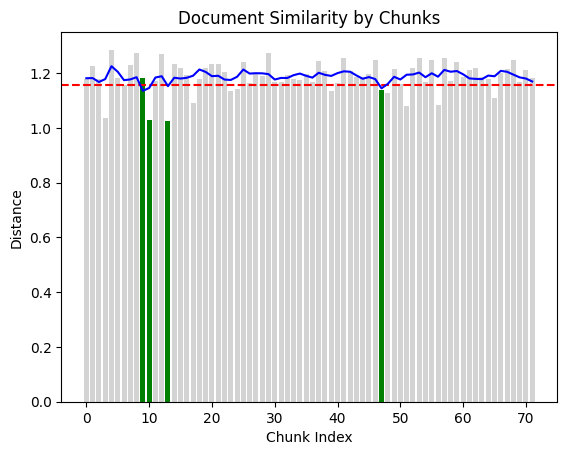

In [124]:
# visualize the document similarity by chunks
import matplotlib.pyplot as plt
import numpy as np

# similar chunks ordered by indices
# ordered_chunks = [chunks[index] for index in indices]
# distances ordered by indices
ordered_distances = [distances[indices[i]] for i in range(len(distances)) if i in indices]
# get a moving average of the distances
moving_average = np.convolve(ordered_distances, np.ones(5)/5, mode='valid')
# get lowest 5th percentile of the moving average
percentile_5 = np.percentile(moving_average, 5)
# create a line at the 5th percentile
plt.axhline(y=percentile_5, color='r', linestyle='--', label='5th Percentile')
# for bars where moving average is less than 5th percentile, color them red
for i in range(len(moving_average)):
    if moving_average[i] < percentile_5:
        plt.bar(i, ordered_distances[i], color='green')
    else:
        plt.bar(i, ordered_distances[i], color='lightgray')
# create a bar chart
# plt.bar(range(len(ordered_distances)), ordered_distances)
plt.plot(range(len(moving_average)), moving_average, color='blue', label='Moving Average')
plt.xlabel('Chunk Index')
plt.ylabel('Distance')
plt.title('Document Similarity by Chunks')
plt.show()

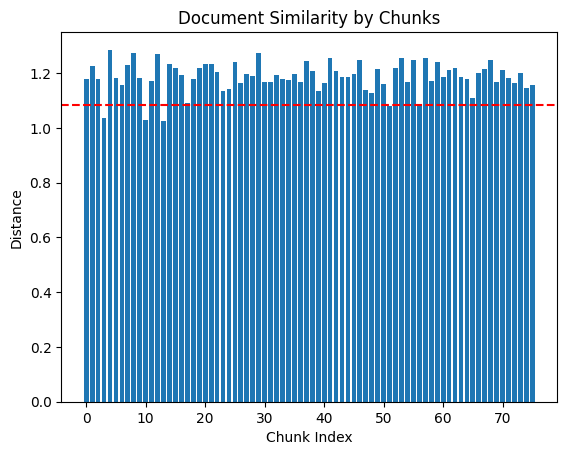

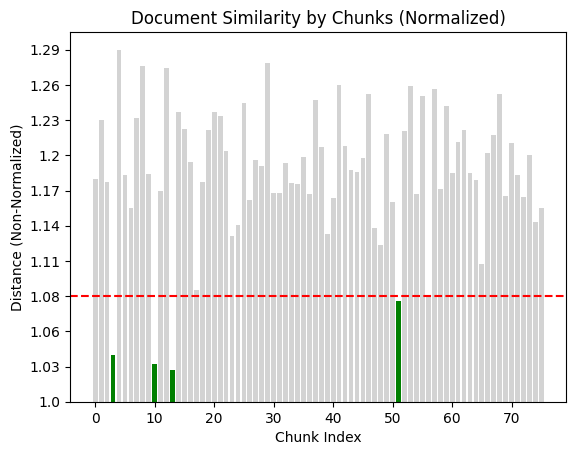

In [129]:
# visualize the document similarity by chunks
import matplotlib.pyplot as plt
import numpy as np

# also plot non normalized distances
ordered_distances = [distances[indices[i]] for i in range(len(distances)) if i in indices]

# get 5th percentile of the distances
percentile_5 = np.percentile(ordered_distances, 5)
# create a line at the 5th percentile
plt.axhline(y=percentile_5, color='r', linestyle='--', label='5th Percentile')
# for bars where distance is less than 5th percentile, color them red
for i in range(len(ordered_distances)):
    if ordered_distances[i] < percentile_5:
        plt.bar(i, ordered_distances[i], color='green')
    else:
        plt.bar(i, ordered_distances[i], color='blue')
# create a bar chart
plt.bar(range(len(ordered_distances)), ordered_distances)
plt.xlabel('Chunk Index')
plt.ylabel('Distance')
plt.title('Document Similarity by Chunks')
plt.show()


# similar chunks ordered by indices
# ordered_chunks = [chunks[index] for index in indices]
# distances ordered by indices

# Normalize the distances to amplify differences

max_distance = max(ordered_distances)
min_distance = min(ordered_distances)
min_distance = min_distance - (max_distance - min_distance)*0.1
normalized_distances = [(d - min_distance) / (max_distance - min_distance) for d in ordered_distances]

# Change size of the figure
# plt.figure(figsize=(50, 20))

# Get the 5th percentile of the normalized distances
percentile_5 = np.percentile(normalized_distances, 5)
plt.axhline(y=percentile_5, color='r', linestyle='--', label='5th Percentile')

# For bars where normalized distance is less than 5th percentile, color them green
for i in range(len(normalized_distances)):
    if normalized_distances[i] < percentile_5:
        plt.bar(i, normalized_distances[i], color='green')
    else:
        plt.bar(i, normalized_distances[i], color='lightgray')

# Use non-normalized labels on the y-axis
# use equidistant ticks
plt.yticks(np.arange(0, 1.1, 0.1), [f"{round(i * (max_distance - min_distance) + min_distance, 2)}" for i in np.arange(0, 1.1, 0.1)])
# plt.bar(range(len(normalized_distances)), normalized_distances)

plt.xlabel('Chunk Index')
plt.ylabel('Distance (Non-Normalized)')
plt.title('Document Similarity by Chunks (Normalized)')
plt.show()

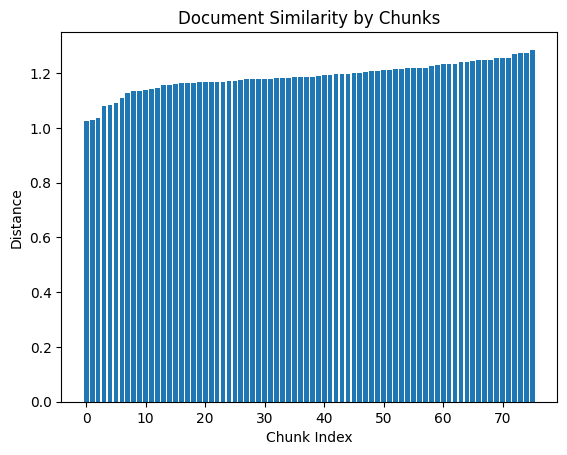

In [126]:
# visualize the document similarity by chunks
import matplotlib.pyplot as plt
import numpy as np

# similar chunks ordered by indices
# ordered_chunks = [chunks[index] for index in indices]
# distances ordered by indices
ordered_distances = [distances[i] for i in range(len(distances)) if i in indices]
# create a bar chart
plt.bar(range(len(ordered_distances)), ordered_distances)
plt.xlabel('Chunk Index')
plt.ylabel('Distance')
plt.title('Document Similarity by Chunks')
plt.show()

56


# SUBDIVISION/CONDOMINIUM APPLICATION 

## 15. SWORN DECLARATION OF APPLICANT

Complete in the presence of a Commissioner for Taking Affidavits. If the declaration is to be administered remotely, you must be able to see, hear and communicate with the Commissioner and show documentation that confirms your identity.
I. Karl Tanner, Dillon Consulting Limited $\qquad$ solemnly declare that the information required under Schedule 1 to Ontario Regulation 544/06 and provided by the applicant is accurate and that t

---
65


# SUBDIVISION/CONDOMINIUM APPLICATION 

## SCHEDULE E - Environmental Site Screening Questionnaire

Previous Use of Property
$\square$ Residential $\quad$ Industrial $\quad \square$ Commercial $\quad \square$ Institutional
$\square$ Agricultural $\quad \square$ Parkland $\quad \square$ Vacant $\quad \square$ Other $\qquad$
a) If previous use of the property is Industrial or Commercial, specify use:

## Manufacturing facility for automobile industry

b) Has the grading of the subject land been changed by add

---
48


on of nearby water bodies, etc.) from the proposed development on the surrounding areas and to mitigate adverse effects from the surrounding areas on the proposed development? In agricultural areas, refer to the Agricultural Code of Practice.
Where potential adverse environmental effects (species-at-risk, wetland protection, floodplains, etc.) are foreseen, consultation with the Ministry of Natural Resources and Forestry, the Ministry of Environment, Conservation and Parks, and/or the Essex Region Conservat
ion Authority is recommended.

See Planning Rationale Report
$\qquad$
$\qquad$
$\qquad$
$\qquad$

## 13. PROPOSED PUBLIC CONSULTATION STRATEGY

Select or describe your proposed strategy for consulting with the public with respect to the application:
$\square$ Required Public Consultation (Public Notice \& Public Meeting as required per the Planning Act)
$\square$ Open House $\square$ Website
Other $\qquad$
$\qquad$
$\qquad$

---
17


pplication, supporting documents, and fee may be returned for completion, correction, or clarification, or the applicant may be requested to submit additional or revised supporting information. Administration, the Development \& Heritage Standing Committee (DHSC), and City of Windsor Council reserve the right to request additional information any time during the processing of the application.
2. If deemed complete, fees are not refundable, the application is circulated to departments and external agencies f

---
10


s:

B1. Boundaries of the land to be subdivided, certified by an Ontario Land Surveyor, and based on NAD83, Zone 17.
B2. Locations, widths and names of proposed roads, streets, highways and rights-of-way within the proposed subdivision and existing roads, streets, highways, and rights-of-way abutting the proposed subdivision;
B3. On a small key plan, with a scale of not less than one centimetre to 100 metres, all of the land adjacent to the proposed subdivision that is owned by the applicant or in which the

---
3


ate if the plan is consistent with the Provincial Policy Statement and conforms to the City of Windsor Official Plan and the appropriate Zoning By-law. If an Official Plan Amendment and/or Zoning By-law Amendment is required, you must have already submitted those applications, or must submit them with this application, otherwise this application will be returned.

Section 7: Complete this section if you are applying for approval of a Plan of Condominium. New construction applies to buildings that were recen

---
51


## [⿴囗 Plan of Condominium - Draft Approval - New Building

| Code 53007 | Base Fee: $\quad 232$ | lots/units at $\$ 185.00$ per lot/unit | \$ 42,920.00 |
| :--: | :--: | :--: | :--: |
| Code 63024 | GIS Fee | $+\$ 50.00$ |  |
| Code 53023 | Essex Region Conservation Authority Fee | $+\$ 300.00$ |  |
| Code 53010 | Legal Fee - Agreement Preparation | $+\$ 1,714.98$ |  |
| Code 53010 | Legal Variable Fee: $\qquad$ lots/units at $\$ 50.00$ per lot/unit | $+\$ 11,600.00$ |  |
|  | Plan of Condominium (Draft Ap
proval) Total Fee | $=\$ 56,584.98$ |  |

## $\square$ Condominium Conversion - Draft Approval - Existing Building

---
13


ng ESAs \& ANSIs) within or adjacent to the land proposed to be subdivided;
B9. Availability and nature of domestic water supplies;
B10. Nature and porosity of the soil;
B11. Existing contours or elevations as may be required to determine the grade of the streets, roads and highways and the drainage of the land proposed to be subdivided;
B12. Municipal services available or are to be available to the land proposed to be subdivided;
B13. Nature and extent of any restrictions affecting the land proposed to be
 subdivided including restrictive covenants, easements, or the Airport Operating Area; and
B14. Floodplains, flood ways, flood prone areas, and flood elevations

## C. CONDOMINIUM DRAFT PLAN REQUIREMENTS

In addition to the above requirements, draft plans proposing condominium ownership must include:
C1. Proposed exclusive use areas of the common element such as backyards and parking;
C2. Roadways and pedestrian access to proposed private units.

---
[31, 58, 29, 2, 75, 32, 14, 59, 73, 34, 1, 24, 72, 0, 62, 57, 41, 5, 28, 56, 61, 60, 47, 8, 11, 64, 16, 42, 39, 74, 23, 22, 40, 27, 26, 44, 21, 65, 48, 9, 17, 71, 49, 38, 37, 43, 67, 10, 7, 53, 15, 3, 54, 70, 20, 66, 4, 69, 25, 63, 36, 51, 55, 35, 30, 6, 46, 52, 68, 19, 50, 33, 18, 45, 12, 13]


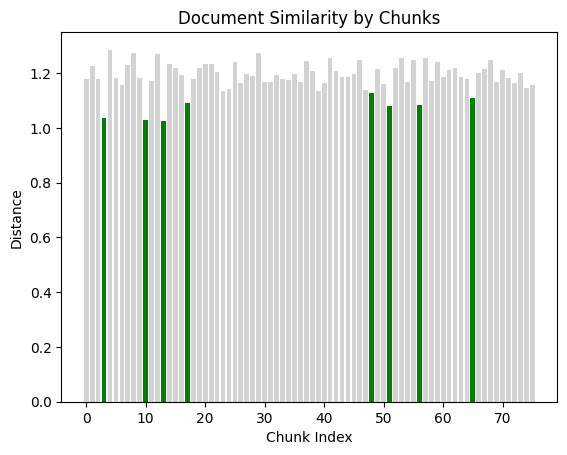

In [135]:
# display chunks in top 5 percentile as markdown, separate by divider
def display_chunks(chunks, indices, distances):
    # get the top 5 percentile of the distances
    percentile_5 = np.percentile(distances, 10)
    # get the chunks in the top 5 percentile
    top_chunks = [chunks[index] for index in indices if ordered_distances[index] < percentile_5]
    top_chunk_indices = [index for index in indices if ordered_distances[index] < percentile_5]
    # display the chunks
    for chunk, index in zip(top_chunks, top_chunk_indices):
        print(index)
        print_markdown(chunk)
        print("---")
    # plot top chunks as green, rest as light gray
    for i in range(len(chunks)):
        if i in top_chunk_indices:
            plt.bar(i, ordered_distances[i], color='green')
        else:
            plt.bar(i, ordered_distances[i], color='lightgray')
    # create a bar chart
    # plt.bar(range(len(ordered_distances)), ordered_distances)
    plt.xlabel('Chunk Index')
    plt.ylabel('Distance')
    plt.title('Document Similarity by Chunks')
    
# display the chunks
display_chunks(chunks, indices, distances)
print(indices)
# get the top 5 percentile of the distances
# percentile_5 = np.percentile(distances, 95)
